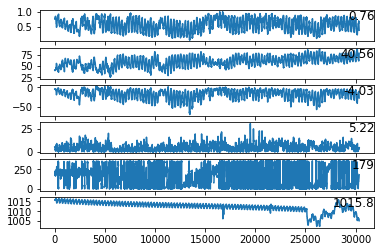

In [6]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('multi.csv', header=0, index_col=0)
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5]
i = 1
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [5]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = read_csv('multi.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14]], axis=1, inplace=True)
print(reframed.head())

IndexError: index 14 is out of bounds for axis 0 with size 14

(30350, 28)
(8760, 24) 8760 (8760,)
(8760, 3, 8) (8760,) (21590, 3, 8) (21590,)
Train on 8760 samples, validate on 21590 samples
Epoch 1/50
8760/8760 [==============================] - 2s 183us/step - loss: 0.0738 - val_loss: 0.0649
Epoch 2/50
8760/8760 [==============================] - 1s 80us/step - loss: 0.0220 - val_loss: 0.0457
Epoch 3/50
8760/8760 [==============================] - 1s 83us/step - loss: 0.0180 - val_loss: 0.0360
Epoch 4/50
8760/8760 [==============================] - 1s 82us/step - loss: 0.0148 - val_loss: 0.0230
Epoch 5/50
8760/8760 [==============================] - 1s 83us/step - loss: 0.0150 - val_loss: 0.0200
Epoch 6/50
8760/8760 [==============================] - 1s 82us/step - loss: 0.0125 - val_loss: 0.0194
Epoch 7/50
8760/8760 [==============================] - 1s 84us/step - loss: 0.0108 - val_loss: 0.0199
Epoch 8/50
8760/8760 [==============================] - 1s 82us/step - loss: 0.0092 - val_loss: 0.0165
Epoch 9/50
8760/8760 [========================

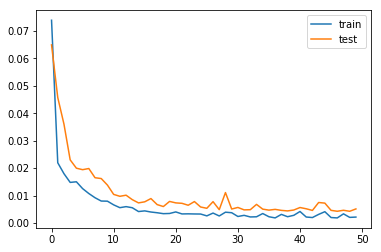

ValueError: operands could not be broadcast together with shapes (21590,8) (7,) (21590,8) 

In [11]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset
dataset = read_csv('multi.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# specify the number of lag hours
n_hours = 3
n_features = 8
# frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, 1)
print(reframed.shape)

# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=10, validation_data=(test_X, test_y), verbose=1, shuffle=True)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -7:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -7:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))

In [9]:
history.history

{'loss': [0.11881444478145967,
  0.059314870981065783,
  0.02574075884377099,
  0.02172171447796058,
  0.020266446705320722,
  0.019765127053458804,
  0.018670881483448695,
  0.017912484417758778,
  0.015945517962913297,
  0.017035530527020257,
  0.016181714085173118,
  0.015166180236073695,
  0.014211050005093829,
  0.013199354628458211,
  0.012452529198553872,
  0.012387617196798427,
  0.012139293322441716,
  0.010244148637308445,
  0.0096655542302034689,
  0.011038566948463247,
  0.0091317670116813424,
  0.0088872797308770356,
  0.0084854374792784036,
  0.0083950368575879362,
  0.0074535103642368967,
  0.0070346254322754395,
  0.0089062207372068141,
  0.0088668094542872621,
  0.0061629519022822583,
  0.0072401646908997778,
  0.0065332299369476633,
  0.0062042091127918805,
  0.0055262036226077435,
  0.0059591233843542023,
  0.0078509604730579545,
  0.0056284178691048637,
  0.0052619898481268993,
  0.0056439861211900226,
  0.0054632244871654998,
  0.0054528577610442087,
  0.0051370974